In [30]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,log_loss

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [15,8]

In [31]:
df_train=pd.read_csv('train_data.csv')

In [32]:
df_train.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,nan,nan,nan,360.000000,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.000000,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,nan,nan,nan,360.000000,not_neg,not_int,lpsm,nan,sb,pr,home,1U,4980.000000,EQUI,552,EXP,55-64,to_inst,nan,North,direct,1,nan
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.000000,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.000000,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,nan,360.000000,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.000000,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.000000,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.000000,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000


In [33]:
df_train['Status'].value_counts(normalize=True)*100
#percent of output class, not imbalanced

0   75.355485
1   24.644515
Name: Status, dtype: float64

# Variable types

In [34]:
df_train.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

# Missing values treatment

In [35]:
df_train.drop('ID',axis=1,inplace=True)
#since id is unique

In [36]:
df_train.isnull().sum()

year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
LTV                 

In [37]:
a=(df_train.isnull().sum()/len(df_train))*100
b=a[a>0].index
b
#below are the varibales that has missing values

Index(['loan_limit', 'approv_in_adv', 'loan_purpose', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'property_value', 'income', 'age', 'submission_of_application', 'LTV',
       'dtir1'],
      dtype='object')

In [38]:
df_train['loan_limit'].value_counts()
#'loan_limit',approv_in_adv', 'loan_purpose','term', 'Neg_ammortization','submission_of_application','age' are categorical
#while rest are numerical

cf     135348
ncf      9978
Name: loan_limit, dtype: int64

In [39]:
c=['loan_limit','approv_in_adv', 'loan_purpose','term', 'Neg_ammortization','submission_of_application','age'] #categorical missing values
d=[i  for i in b if i not in c]#numerical missing values

In [40]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(strategy='most_frequent')
df_train[['loan_limit','approv_in_adv', 'loan_purpose','term', 'Neg_ammortization','submission_of_application','age']]=sim.fit_transform(df_train[['loan_limit','approv_in_adv', 'loan_purpose','term', 'Neg_ammortization','submission_of_application','age']])

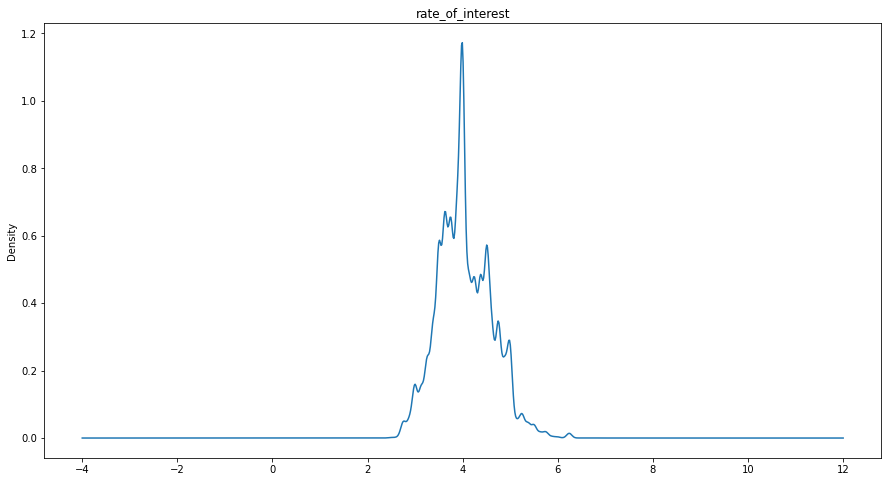

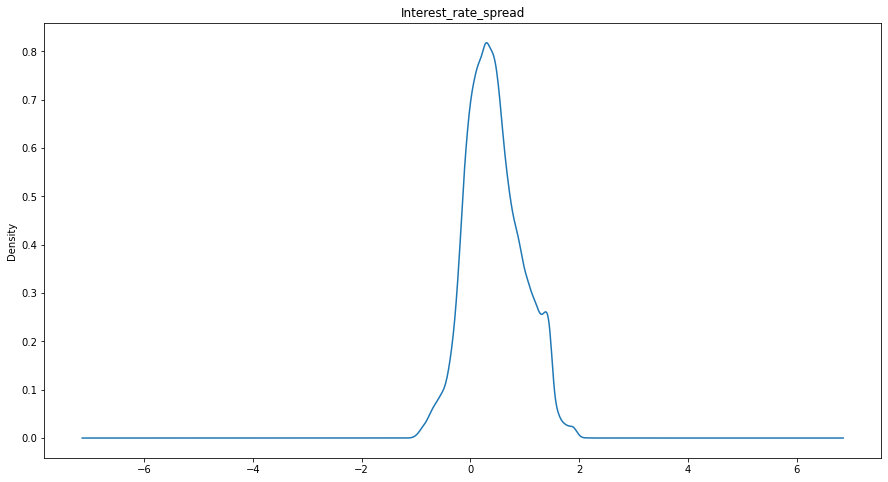

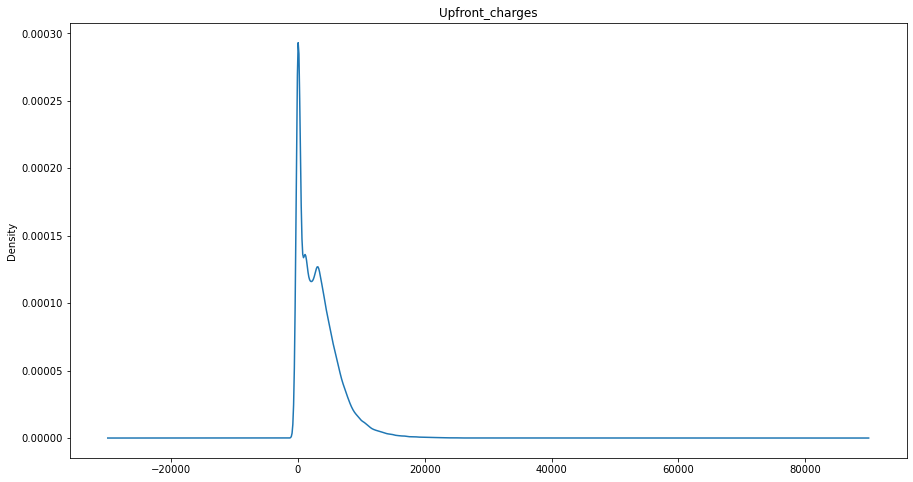

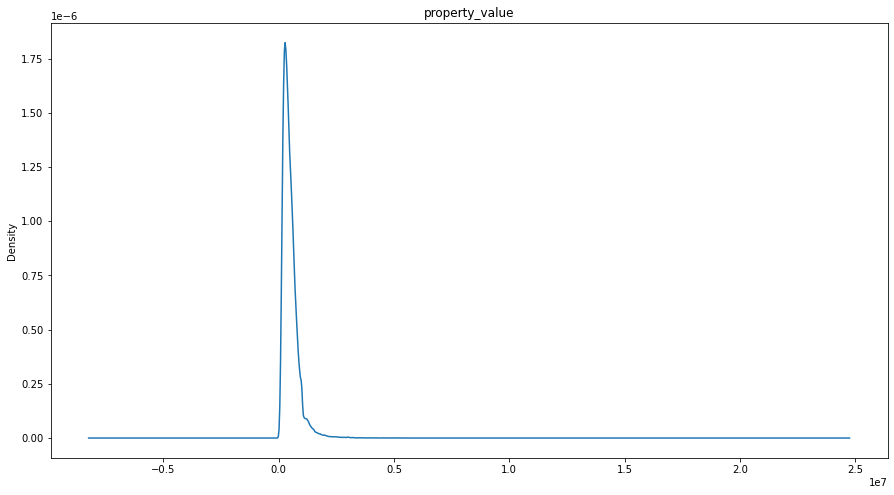

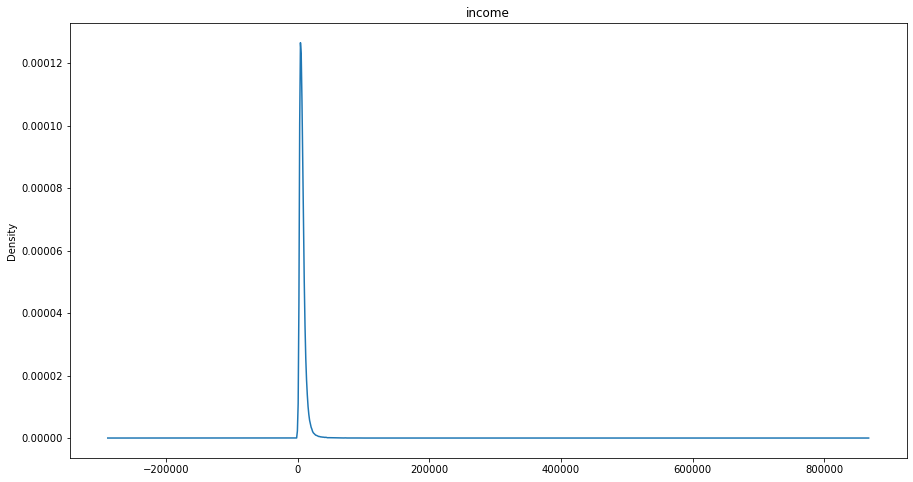

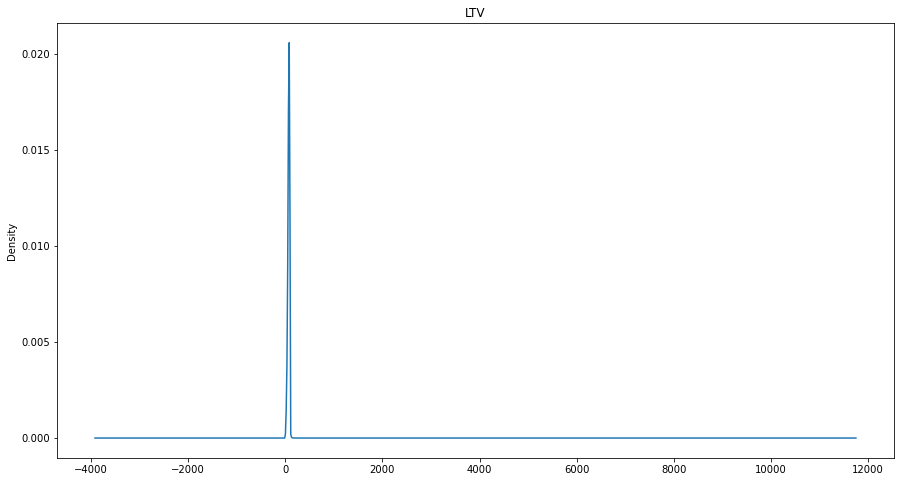

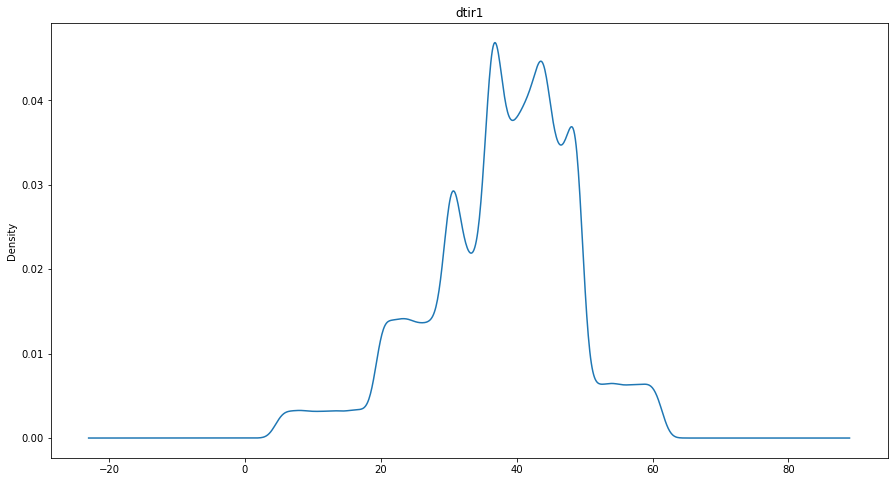

In [12]:
for i in d:
    df_train[i].plot(kind='kde')
    plt.title(i)
    plt.show()
#not looks like a normal distribution,so we will replace by median

In [41]:
sim1=SimpleImputer(strategy='median')
df_train[['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'property_value',
 'income',
 'LTV',
 'dtir1']]=sim1.fit_transform(df_train[['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'property_value',
 'income',
 'LTV',
 'dtir1']])

In [42]:
df_train.isnull().sum()

year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1   

# Numerical and categorical variables

In [43]:
df_trainnum=df_train.select_dtypes(np.number)
df_traincat=df_train.select_dtypes('object')
#lets check if we can drop any variables

In [44]:
for i in df_traincat.columns:
    print(df_train[i].value_counts(normalize=True)*100)
#we can drop year,open_credit,[Credit_worthiness,interest_only,lump_sum,total_units(maybe)],construction_type,secured_by,security_type

cf    93.288491
ncf    6.711509
Name: loan_limit, dtype: float64
Male                28.483218
Joint               27.846237
Sex Not Available   25.330598
Female              18.339948
Name: Gender, dtype: float64
nopre   84.434654
pre     15.565346
Name: approv_in_adv, dtype: float64
type1   76.123630
type2   13.965158
type3    9.911213
Name: loan_type, dtype: float64
p3   37.713056
p4   36.859487
p1   23.225264
p2    2.202193
Name: loan_purpose, dtype: float64
l1   95.744938
l2    4.255062
Name: Credit_Worthiness, dtype: float64
nopc   99.626017
opc     0.373983
Name: open_credit, dtype: float64
nob/c   86.034842
b/c     13.965158
Name: business_or_commercial, dtype: float64
not_neg   89.823771
neg_amm   10.176229
Name: Neg_ammortization, dtype: float64
not_int    95.217596
int_only    4.782404
Name: interest_only, dtype: float64
not_lpsm   97.723818
lpsm        2.276182
Name: lump_sum_payment, dtype: float64
sb   99.977803
mh    0.022197
Name: construction_type, dtype: float64
pr   

In [16]:
df_trainnum.std()

year                        0.000000
loan_amount            183909.310127
rate_of_interest            0.488348
Interest_rate_spread        0.445907
Upfront_charges          2797.972965
term                       58.402488
property_value         342022.063957
income                   6300.067060
Credit_Score              115.875857
LTV                        37.890714
Status                      0.430942
dtir1                       9.663417
dtype: float64

In [45]:
df_traincat.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

# EDA

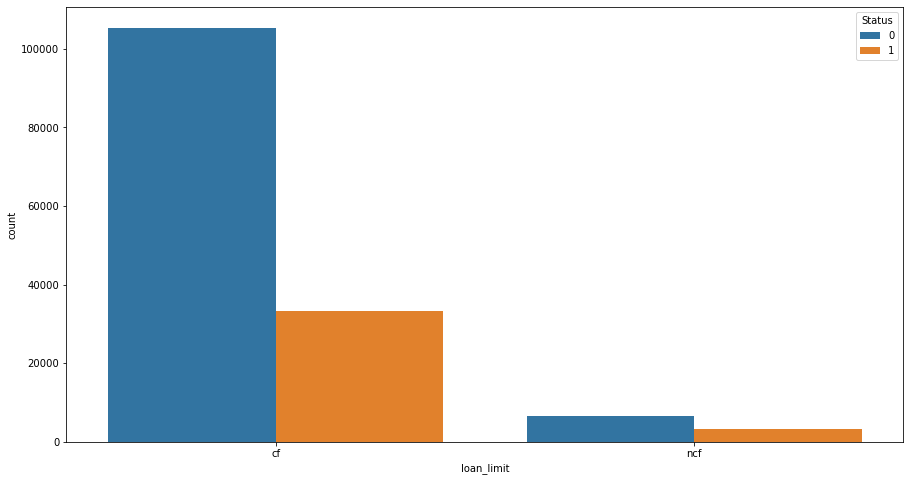

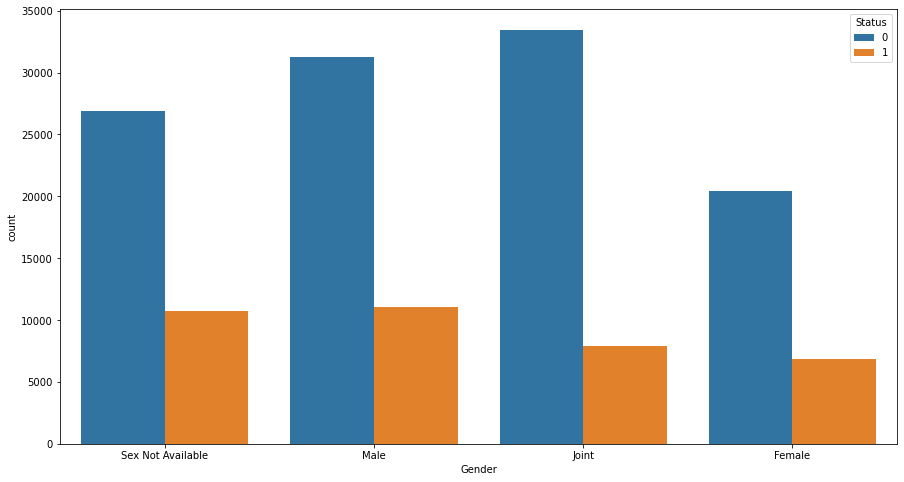

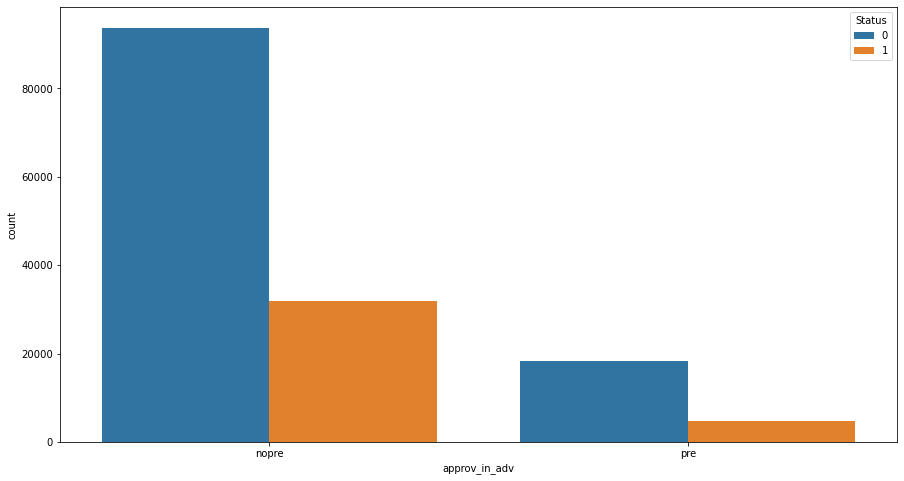

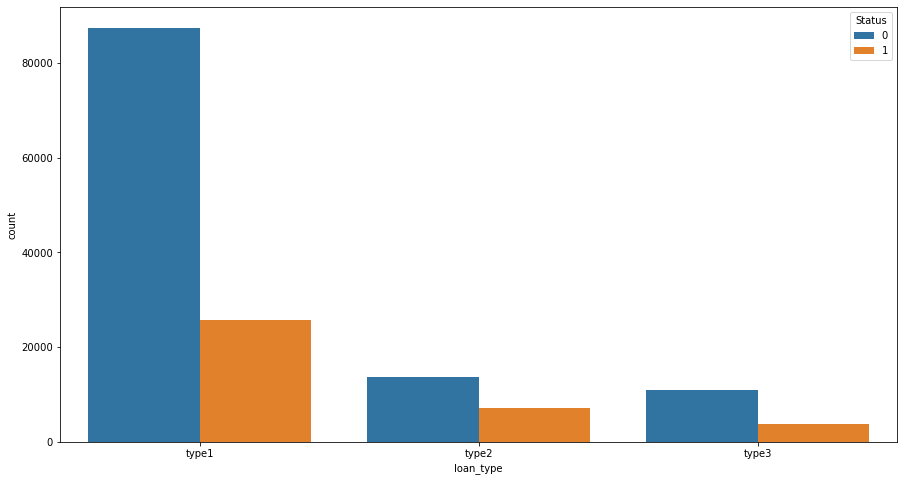

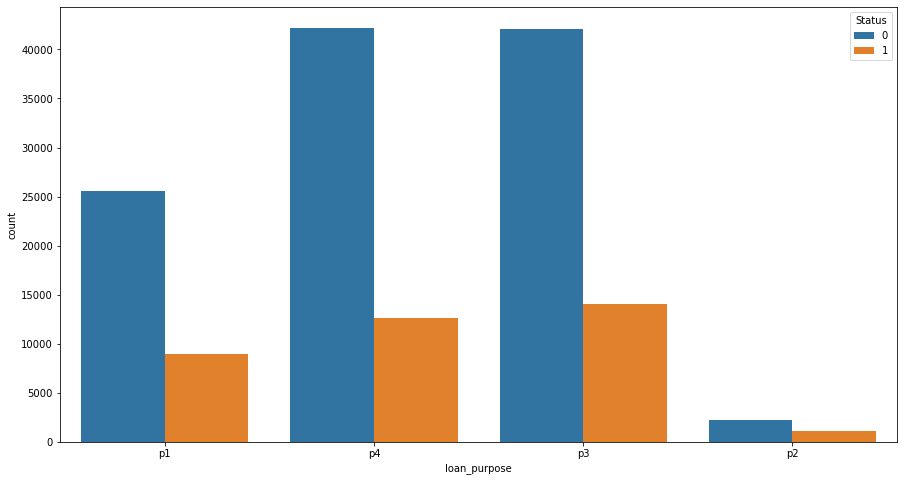

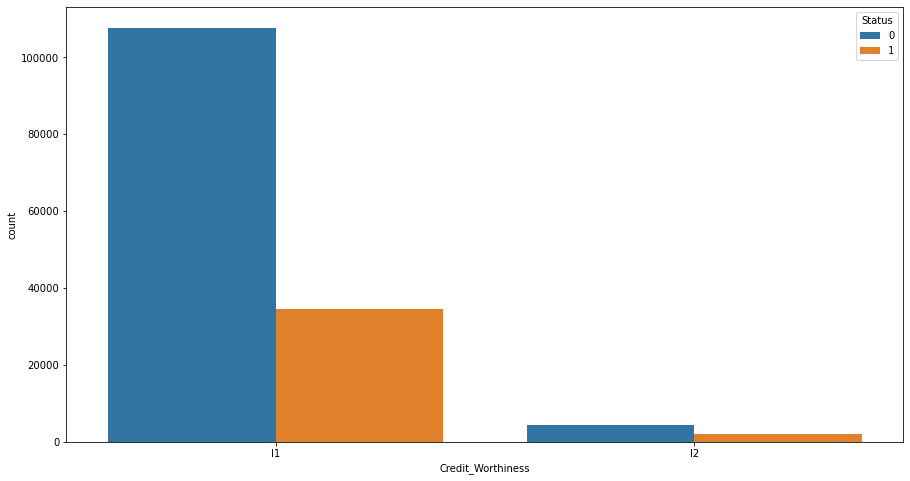

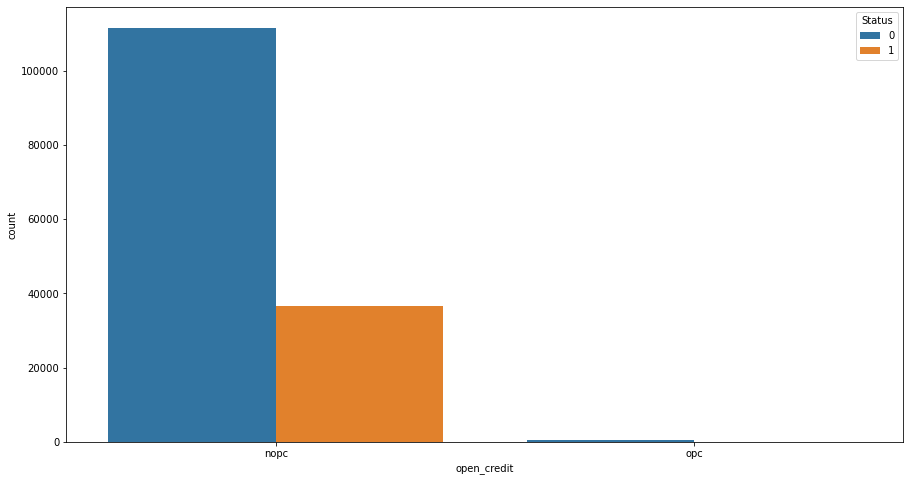

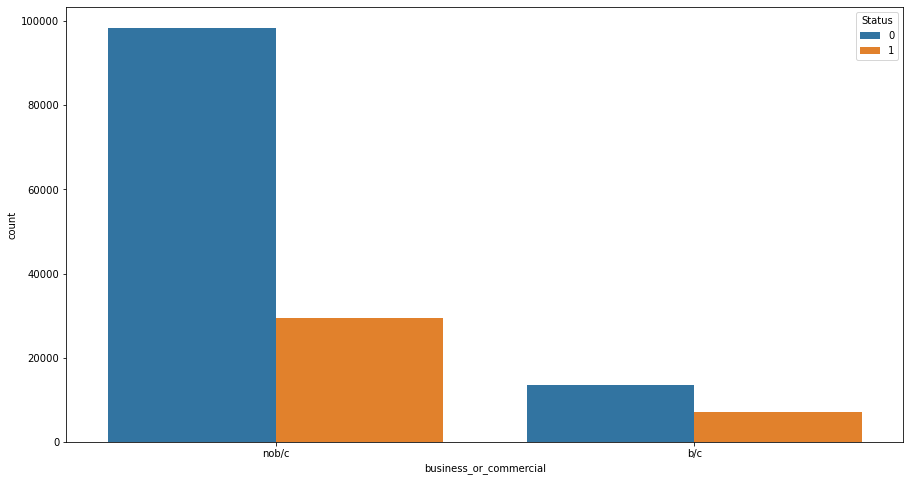

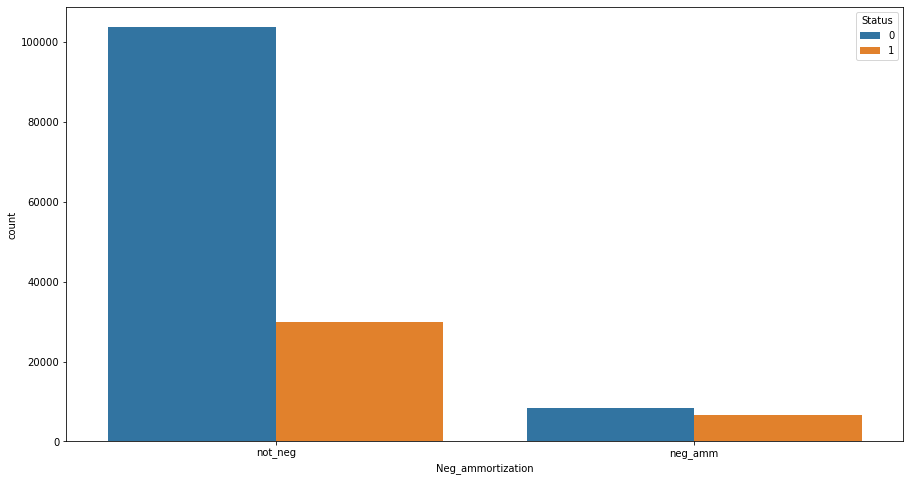

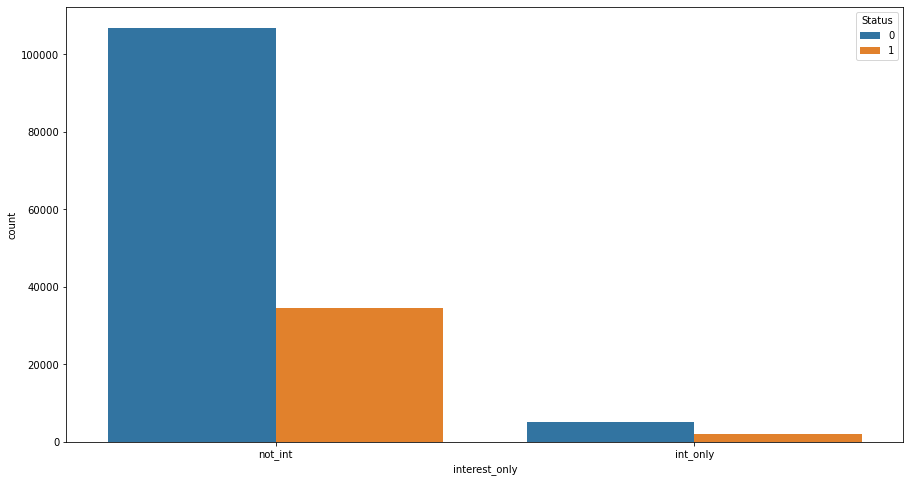

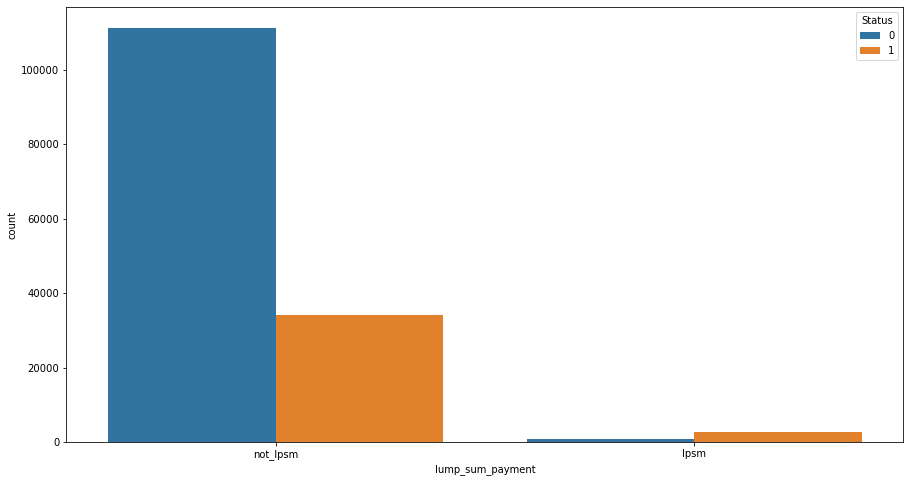

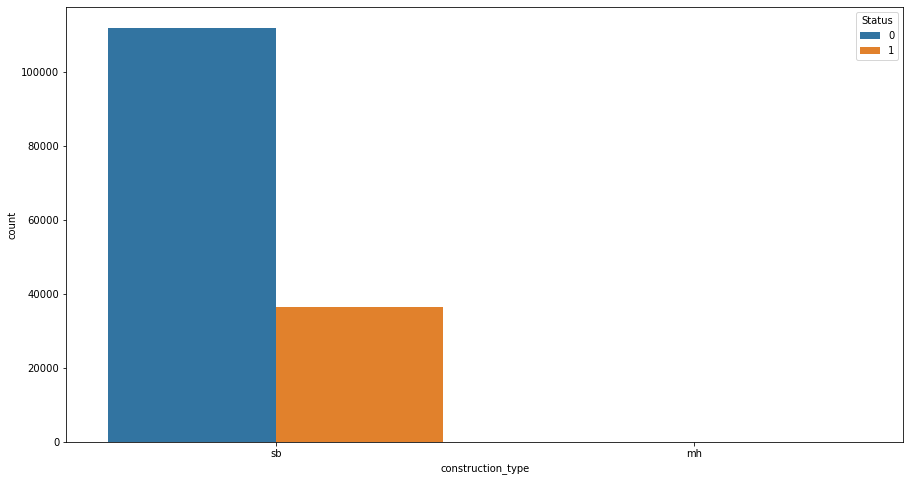

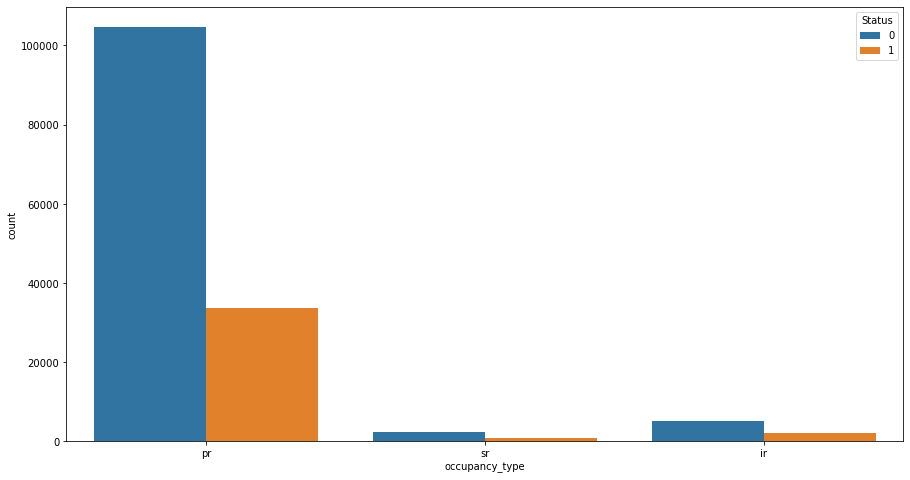

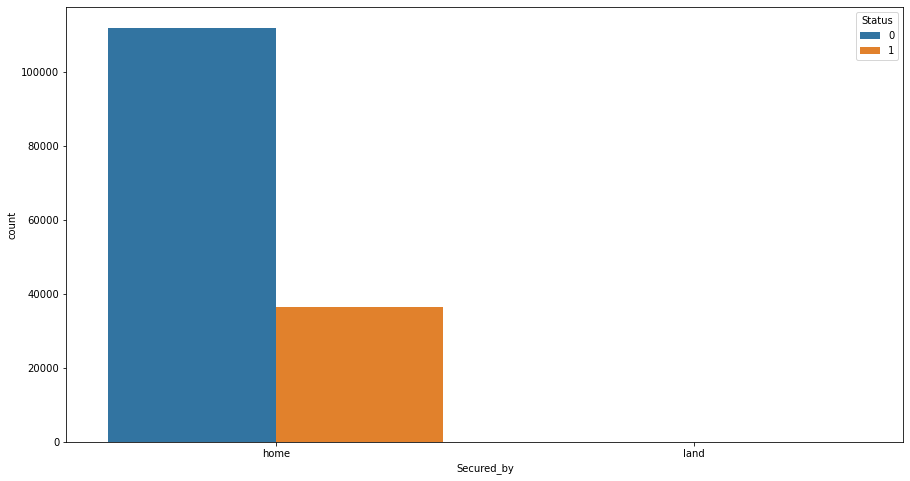

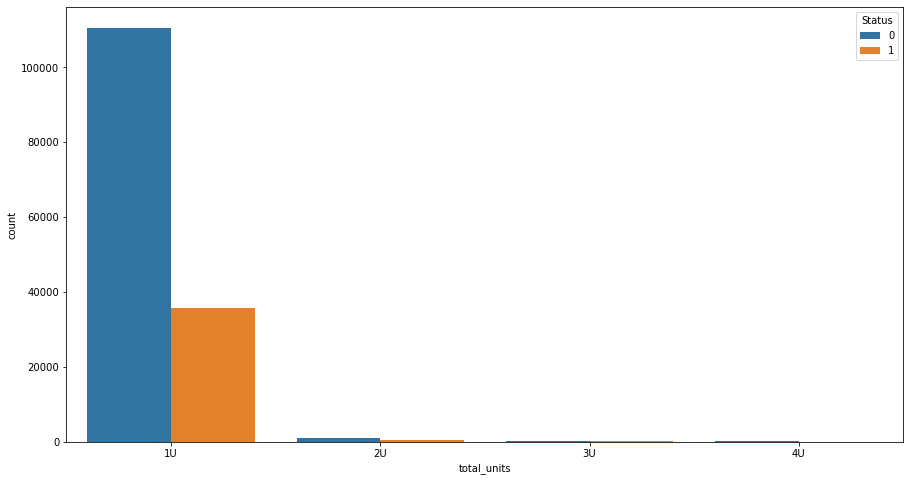

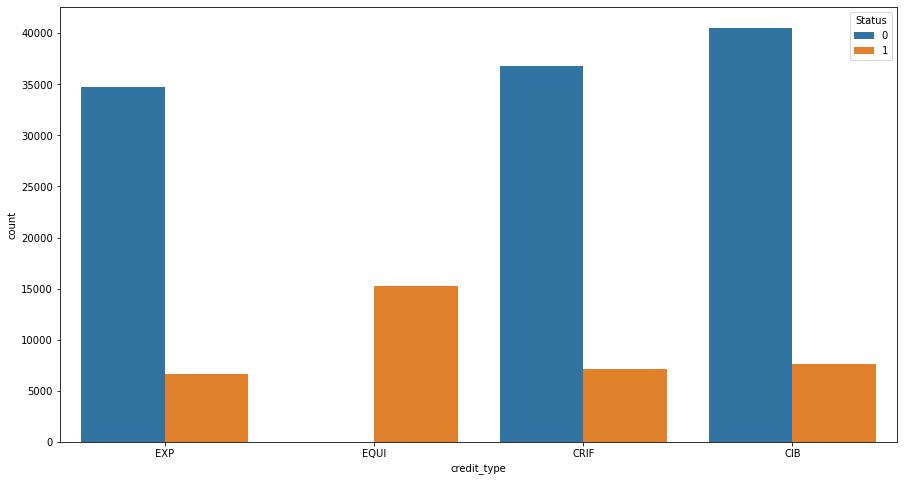

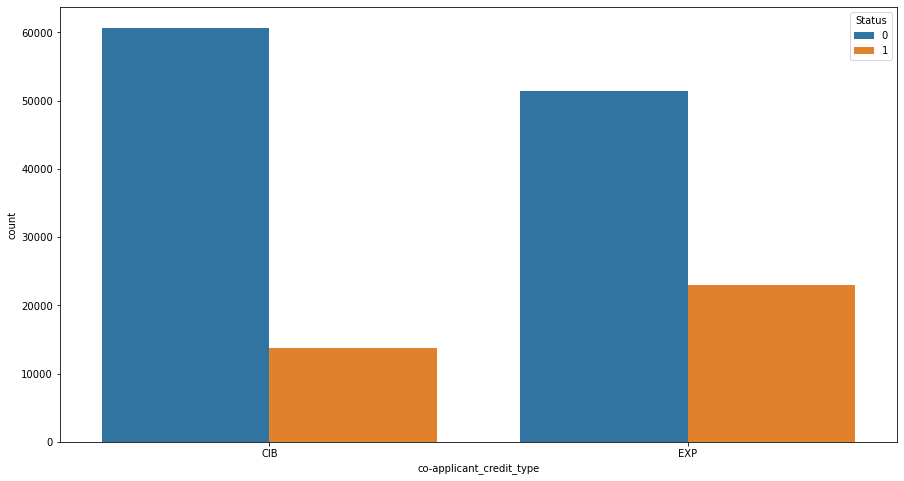

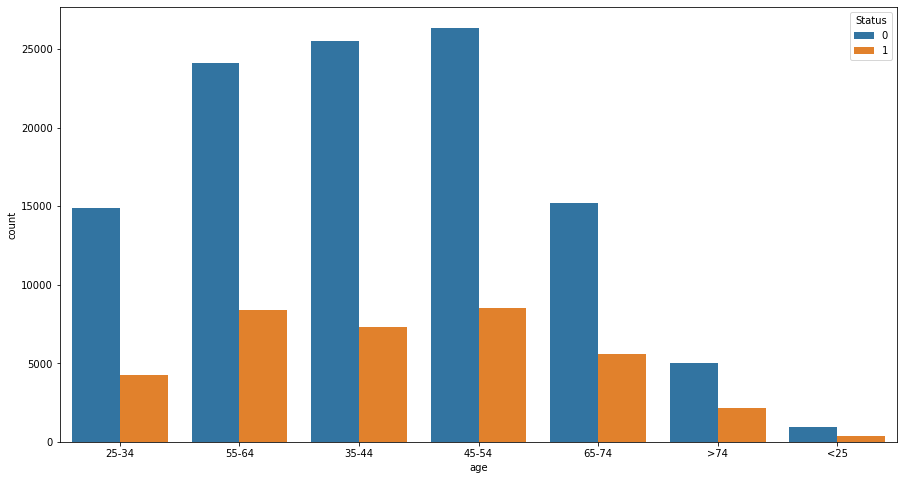

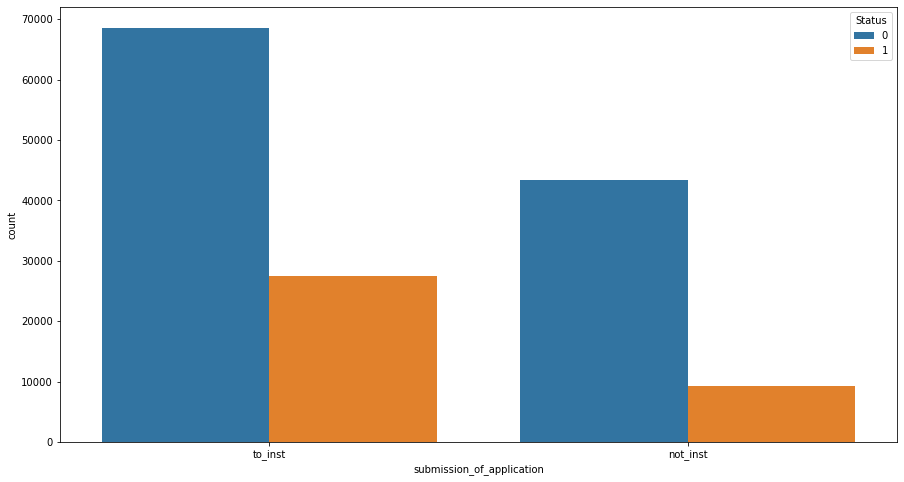

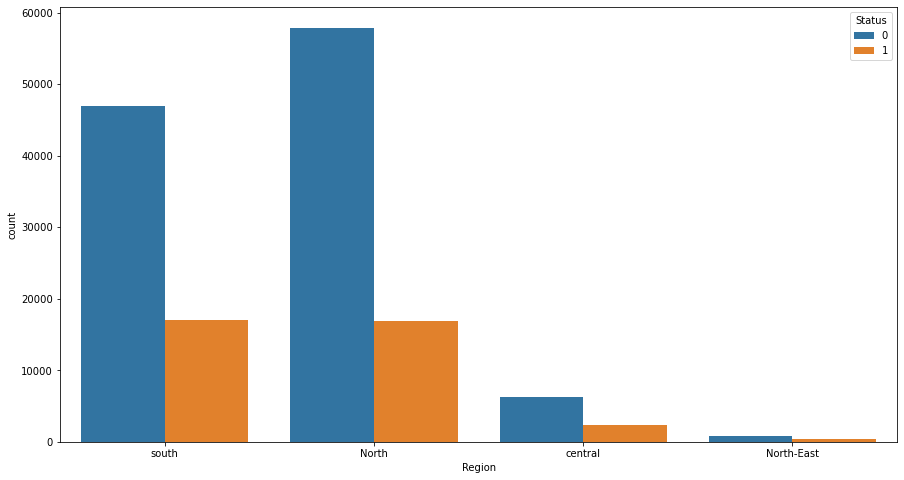

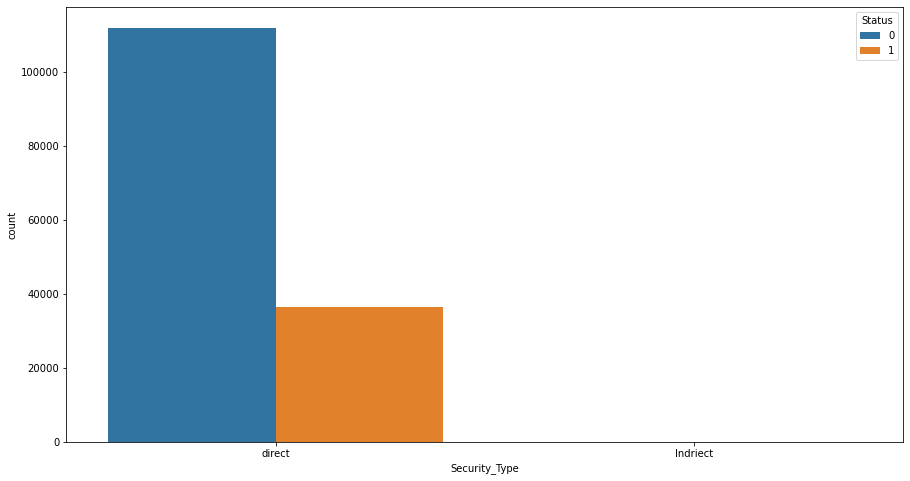

In [26]:
for i in df_trainnum.columns:
    sns.countplot(df_trainnum[i],hue=df_trainnum['Status'])
    plt.show()

In [18]:
#df_train1=df_train.drop(['year','open_credit','occupancy_type','construction_type','Secured_by','Security_Type','Credit_Worthiness','lump_sum_payment','total_units'],axis=1)
df_train1=df_train.drop(['year','Secured_by','Security_Type'],axis=1)
df_trainnum=df_train1.select_dtypes(np.number)
df_traincat=df_train1.select_dtypes('object')

# Statistics

In [69]:
df_train1.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Status', 'dtir1'],
      dtype='object')

In [81]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy import stats
from statsmodels.stats import weightstats as stests

In [76]:
table = pd.crosstab(df_train1['Status'], df_train1['Gender'])

# observed values  
observed_value = table.values
observed_value

array([[20418, 33466, 31255, 26892],
       [ 6848,  7933, 11091, 10767]], dtype=int64)

In [77]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))

print('Critical value for chi-square test:', chi2_val)
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
#We fail to accept null hypothesis and conclude gender and status are dependent

Critical value for chi-square test: 7.8147
Test statistic: 1043.6008495787446
p-value: 6.2600483303596965e-226


In [86]:
a=df_train1[df_train1['Status']==1]['Interest_rate_spread']
b=df_train1[df_train1['Status']==0]['Interest_rate_spread']


stat, p_value = stats.shapiro(df_train1['Interest_rate_spread'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal but since we have a lot of data we can go with parametric test

z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)
#Interest rate spread affects the loan payment

Test statistic: 0.9591214656829834
P-Value: 0.0
Z-score:  -19.123136035309813
p-value:  1.6206386129904405e-81


In [89]:
a=df_train1[df_train1['Status']==1]['Credit_Score']
b=df_train1[df_train1['Status']==0]['Credit_Score']


stat, p_value = stats.shapiro(df_train1['Credit_Score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal but since we have a lot of data we can go with parametric test

z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)
#credit score doen't affect the loan payment. Since both have same averages

Test statistic: 0.9547451734542847
P-Value: 0.0
Z-score:  1.5437361122829276
p-value:  0.12265227408658995


In [88]:
a=df_train1[df_train1['Status']==1]['property_value']
b=df_train1[df_train1['Status']==0]['property_value']


stat, p_value = stats.shapiro(df_train1['property_value'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal but since we have a lot of data we can go with parametric test

z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)
#property_value affects the loan payment

Test statistic: 0.7272564172744751
P-Value: 0.0
Z-score:  -31.297522594570793
p-value:  5.042924229207265e-215


In [90]:
a=df_train1[df_train1['Status']==1]['Upfront_charges']
b=df_train1[df_train1['Status']==0]['Upfront_charges']


stat, p_value = stats.shapiro(df_train1['Upfront_charges'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)
#not normal but since we have a lot of data we can go with parametric test

z_score, pval = stests.ztest(x1 =a, x2 = b, value = 0, alternative = 'two-sided')
print("Z-score: ", z_score)
print("p-value: ", pval)
#Upfront charges affects the loan payment

Test statistic: 0.8176487684249878
P-Value: 0.0
Z-score:  -36.8325835958673
p-value:  5.558095167965123e-297


# Outlier treatment

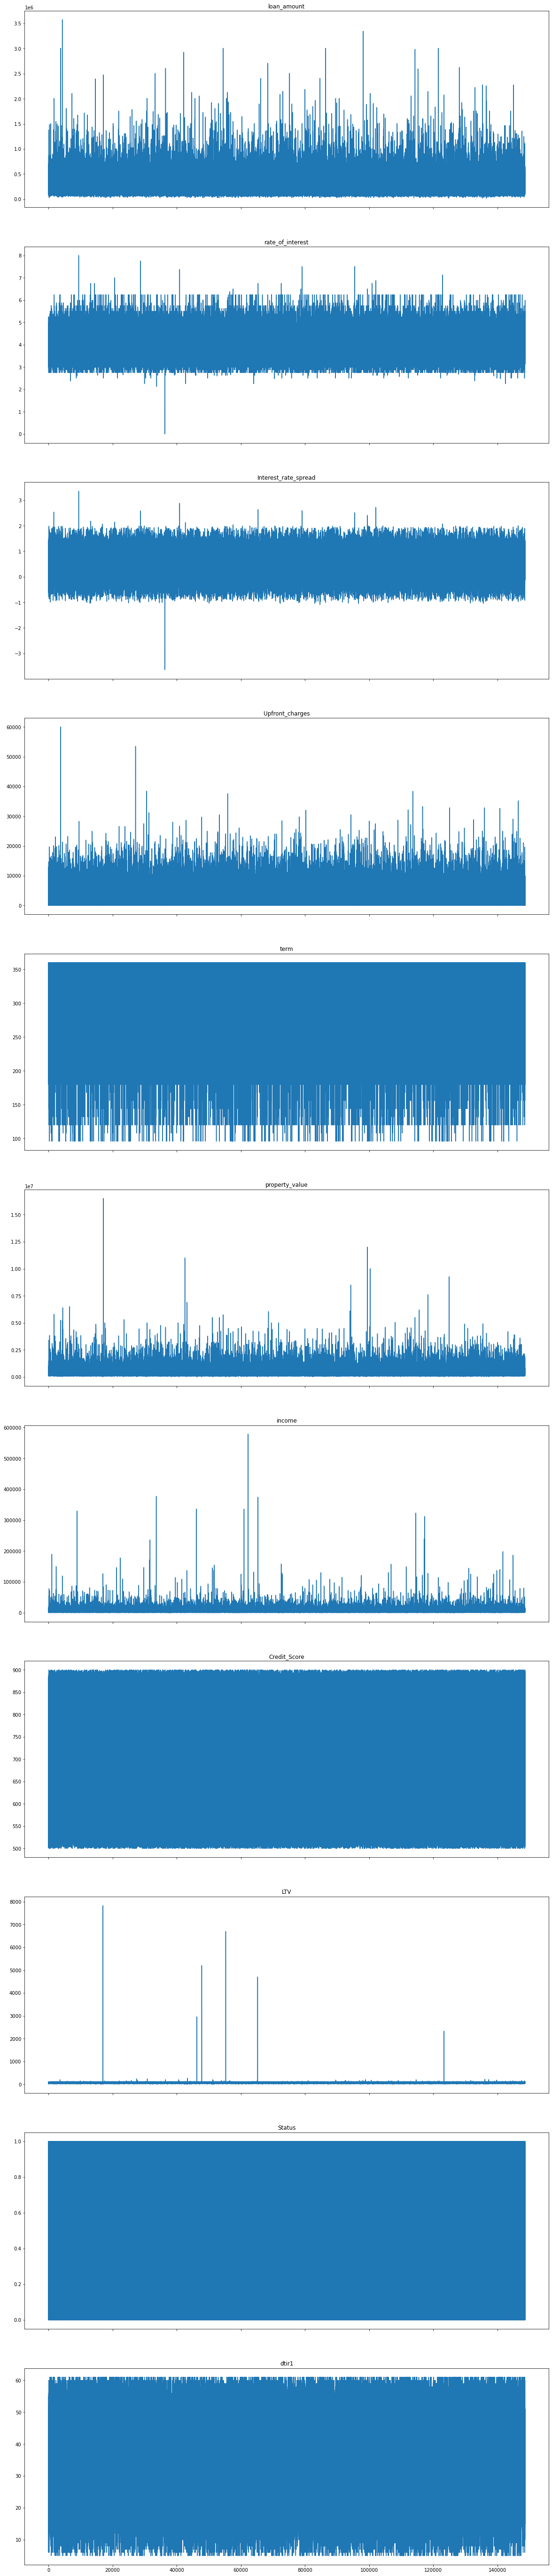

In [19]:
columns = list(df_trainnum.columns)
fig, ax = plt.subplots(nrows=len(columns), ncols=1, sharex=True, figsize=(20,100))
for i in range(len(columns)):
    ax[i].plot(df_train1[columns[i]])
    ax[i].set_title(columns[i])


In [20]:
df_trainnum.columns

Index(['loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [61]:
#rate of interest between 2 and 7-no
#Interesr_rate_spread between -2 and 2-no
#upfront charges less than 35000
#property values less than 7500000
#income less than 400000
#LTV less than 1000
#loan amount less than 2500000

In [46]:
df_train2=df_train1.copy()
#df_train2=df_train2[df_train1['loan_amount']<3100000]
df_train2=df_train2[(df_train1['rate_of_interest']>2)&(df_train2['rate_of_interest']<7)]
df_train2=df_train2[(df_train1['Interest_rate_spread']>-2)&(df_train2['Interest_rate_spread']<2.5)]
df_train2=df_train2[df_train1['Upfront_charges']<35000]
#df_train2=df_train2[df_train1['property_value']<8000000]
df_train2=df_train2[df_train1['income']<250000]
#df_train2=df_train2[df_train1['LTV']<2000]
df_train2.reset_index(inplace=True,drop=True)

In [47]:
df_train2.reset_index(inplace=True,drop=True)


In [48]:
df_train2.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.990000,0.390400,2596.450000,360.000000,not_neg,not_int,not_lpsm,118000.000000,sb,pr,1U,1740.000000,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.990000,0.390400,2596.450000,360.000000,not_neg,not_int,lpsm,418000.000000,sb,pr,1U,4980.000000,EQUI,552,EXP,55-64,to_inst,75.135870,North,1,39.000000
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.000000,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,1U,9480.000000,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,2596.450000,360.000000,not_neg,not_int,not_lpsm,658000.000000,sb,pr,1U,11880.000000,EXP,587,CIB,45-54,not_inst,69.376900,North,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.000000,not_neg,not_int,not_lpsm,758000.000000,sb,pr,1U,10440.000000,CRIF,602,EXP,25-34,not_inst,91.886544,North,0,39.000000


In [49]:
num1=df_train2.select_dtypes(np.number)
cat1=df_train2.select_dtypes('object')

In [50]:
y=num1['Status']
num1_new=num1.drop('Status',axis=1)

In [51]:
y.isnull().sum()

0

In [52]:
Y=df_train1['Status']
num1s=df_train1.select_dtypes(np.number).drop('Status',axis=1)
cat1s=df_train1.select_dtypes('object')

# Scaling and dummy encoding

In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
catc=cat1.copy()
ss=StandardScaler()
mm=MinMaxScaler()
le=LabelEncoder()
catc=pd.get_dummies(catc,drop_first=True)
num21=ss.fit_transform(num1_new)
num=pd.DataFrame(num21,columns=num1_new.columns)

In [54]:
df1=pd.concat([num,catc],axis=1)

# Base model

In [56]:
from sklearn.model_selection import train_test_split
x=df1
x1=num
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [57]:
df2=pd.concat([catc,num1_new],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2,y,test_size=0.2)
x_train=ss.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=df2.columns)
X_test=ss.transform(x_test)
x_test=pd.DataFrame(x_test,columns=df2.columns)
df3=ss.fit_transform(df2)

In [83]:
from sklearn.feature_selection import RFE,RFECV
rfe_cv=RFECV(estimator=rf)
rfe_cv_mod=rfe_cv.fit(xtrain,ytrain)

ranking=pd.DataFrame()
ranking['Feature']=xtrain.columns
ranking['Rank']=rfe_cv_mod.ranking_
rfe_cv_best=list(ranking[ranking['Rank']==1]['Feature'])

In [84]:
rfe_cv_best

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1',
 'loan_type_type2',
 'loan_type_type3',
 'loan_purpose_p4',
 'business_or_commercial_nob/c',
 'Neg_ammortization_not_neg',
 'credit_type_CRIF',
 'credit_type_EQUI',
 'credit_type_EXP',
 'co-applicant_credit_type_EXP',
 'submission_of_application_to_inst']

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
dt=DecisionTreeClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
rf=RandomForestClassifier()
mod_lr=lr.fit(xtrain,ytrain)
ypred_lr=mod_lr.predict(xtest)
mod_gb=gb.fit(xtrain,ytrain)
ypred_gb=mod_gb.predict(xtest)
rf=RandomForestClassifier(max_features='log2')
mod_rf=rf.fit(xtrain,ytrain)
ypred_rf=mod_rf.predict(xtest)

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve,plot_confusion_matrix,SCORERS,roc_auc_score,roc_curve,f1_score,log_loss

In [68]:
print(f1_score(ytest,ypred_rf))
print(f1_score(ytest,ypred_gb))
print(f1_score(ytest,ypred_lr))

1.0
0.9998616108497094
0.6613921237443329


In [40]:
from sklearn import svm
sv=svm.SVC(C=2,gamma=1,kernel='rbf',decision_function_shape='ovr')
mod_sv=sv.fit(xtrain,ytrain)
ypred_sv=mod_sv.predict(xtest)
print(f1_score(ytest,ypred_sv))
#95.33
#71.5
#SVM gave a lower score compared to Random Forest and Gradient Boosting

0.7592838196286472


In [96]:
ytrain.value_counts()

0    89720
1    29194
Name: Status, dtype: int64

# Sampling

In [37]:
sampling=pd.concat([x_train,y_train],axis=1)
#Upsampling the minority class
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = sampling[(sampling['Status']==0)] 
df_minority = sampling[(sampling['Status']==1)] 
# downsample majority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 100000, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_minority_upsampled, df_majority],axis=0)

In [38]:
df_downsampled['Status'].value_counts()

1.000000    100000
0.000000     89658
Name: Status, dtype: int64

In [50]:
x_sample=df_downsampled.drop('Status',axis=1)
y_sample=df_downsampled['Status']

In [47]:
#y_sample.replace('1.000000',1,inplace=True)
#y_sample.replace('0.000000',0,inplace=True)
y_sample.value_counts()

1.000000    100000
0.000000     89658
Name: Status, dtype: int64

# Deep Learning

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.activations import relu,sigmoid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
model = Sequential()
model.add(Dense(len(xtrain.columns), input_dim=len(xtrain.columns), activation="softplus"))
model.add(Dense(30, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.add(Dense(1,activation="sigmoid"))

In [60]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["AUC"])
model.fit(xtrain,ytrain, epochs=20, batch_size=50)
#128b,30e

Epoch 1/20
2379/2379 [==============================] - 4s 1ms/step - loss: 0.2224 - auc: 0.9866
Epoch 2/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0381 - auc: 0.9972
Epoch 3/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0212 - auc: 0.9976
Epoch 4/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0174 - auc: 0.9980
Epoch 5/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0146 - auc: 0.9984
Epoch 6/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0122 - auc: 0.9988
Epoch 7/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0104 - auc: 0.9990
Epoch 8/20
2379/2379 [==============================] - 3s 1ms/step - loss: 0.0094 - auc: 0.9993
Epoch 9/20
2379/2379 [==============================] - 4s 2ms/step - loss: 0.0090 - auc: 0.9991
Epoch 10/20
2379/2379 [==============================] - 4s 1ms/step - loss: 0.0081 - auc: 0.9993
Epoch 11/20
2379/2379 [======

In [62]:
predictions = model.predict(xtest)
pred=[round(x[0]) for x in predictions]
#pred=np.argmax(predictions)

In [65]:
f1_score(ytest,pred)

0.9979267449896336

In [66]:
confusion_matrix(ytest,pred)

array([[22479,    25],
       [    5,  7220]], dtype=int64)

Deep learning gave a F1_score of 99.79%. We can play around with the no. of layers, optimizers, epochs and batch_size

# Important features

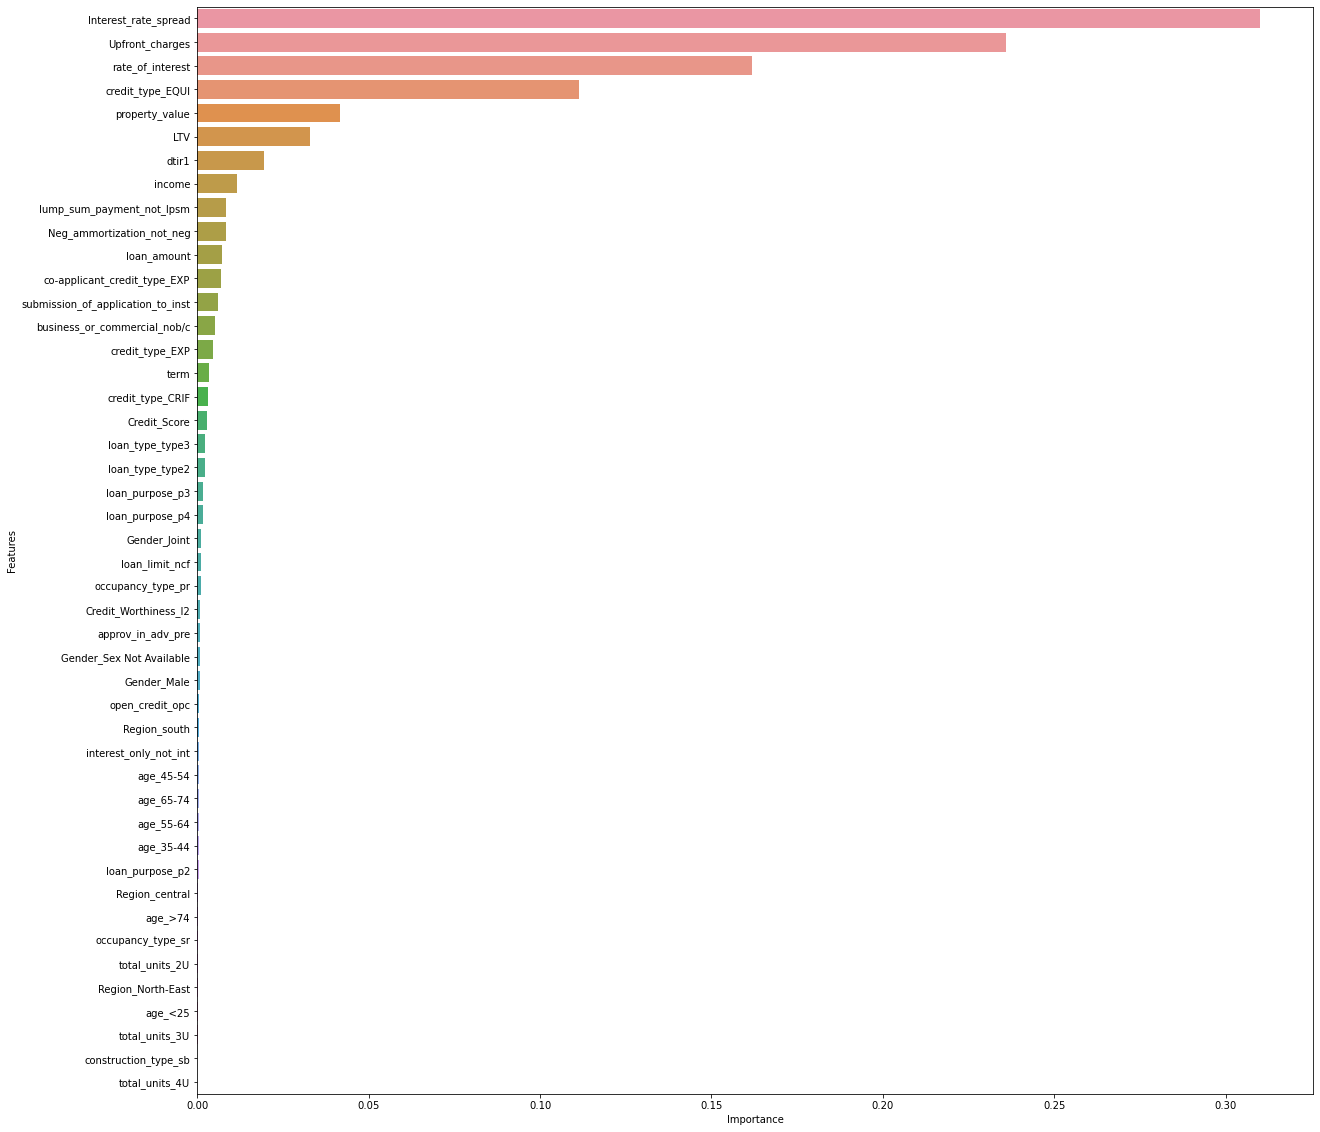

In [78]:
important_features=pd.DataFrame({'Features':xtrain.columns,'Importance':mod_rf.feature_importances_}).sort_values(by='Importance',ascending=False)
plt.figure(figsize=[20,20]);
sns.barplot(x='Importance',y='Features',data=important_features);

Based on hypothesis testing and the feature importances we can see the top interest rate spread, upfront charges and ROI affctes the loan payment